# Decision tree based models

This week we will use the <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv'>vehincle coupon recommendation dataset</a>. Our goal is to classify people based on their driving habits whether they would accept a vehicle coupon or not.

## I. Prepare dataset

1.   Load the `in-vehicle-coupon-recommendation.csv` dataset
2.   Search for missing values and if needed, handle them!
3.   Encode the non numeric variables into numeric ones! For the binary
     features simply encode them as ($0$/$1$). Do not create two separate
     columns for them! You'll have to use the description of the dataset
     provided at its download location!

## II. Train & visualize decision tree classifier

1.   Train a **decision tree classifier** using the `sklearn` API
     -   Use its default parameters
     -   Use all the data
2.   Visualize the decision tree, with the *Gini impurities* also showing on the
     plot. The `plot_tree` function in `sklearn` will be really helpful. You
     may or may not need to tune its arguments to get a reasonable result.
3.   Manually check for the labels and for an arbitrary feature whether the
     returned *Gini impurities* are correct
4.   In a few sentences, discuss the results

## III. Random forest feature importance

1.   Train a random forest classifier on all the data using the sklearn API
     -   Use default values again, but fix the `random_state` to $57$!
2.   Plot the importance values of the $10$ most important features
     -   Create a bar plot where the height of the bar is the feature importance
     -   The `feature_importances_` attribute is helpful

## IV. Evaluation

1.   Generate prediction probabilities with a **decision tree** and with a
     **random forest model**
     -   Use $5$-fold cross validation for both models
     -   Use default parameters for both models
2.   Compare the two models with ROC curves
     -   Why does the shape of the decision tree's ROC curve looks different?

## V. Tuning model

1.   Using $80\%$ - $20\%$ train-test split generate predictions for a **random
     forest model**
     -   Set the `random_state` parameter for every run to $57$ for the
         train-test split and for the Random Forest Classifier as well!
2.   Plot the AUC as the function of the number of trees in the forest for both
     the traing and the test data!
3.   Do we experience overfitting if we use too many trees?

### Hints:

-   On total you can get $10$ points for fully completing all tasks.
-   Decorate your notebook with, questions, explanation etc., make it
    self-contained and understandable!
-   Comment your code when necessary
-   Write functions for repetitive tasks!
-   Use the `pandas` package for data loading and handling
-   Use `matplotlib` and `seaborn` for plotting or `bokeh` and `plotly` for
    interactive investigation.
-   Use the `scikit-learn` package for almost everything
-   Use for loops only if it is really necessary!
-   Code sharing is not allowed between student! Sharing code will
    result in zero points.
-   If you use code found on web, it is OK, **but, make its source clear**!

## I. Prepare dataset

1.   Load the `in-vehicle-coupon-recommendation.csv` dataset
2.   Search for missing values and if needed, handle them!
3.   Encode the non numeric variables into numeric ones! For the binary
     features simply encode them as ($0$/$1$). Do not create two separate
     columns for them! You'll have to use the description of the dataset
     provided at its download location!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored

In [3]:
dataframe=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')
dataframe.head(10)


def description(feature):
    des=dict()
    for s in open('description.txt', mode='r').read().split('\n'):
        ss=s.split(':')
        des[ss[0]]=ss[1]
        
    try:
        print(feature,':',des[feature])
    except:
        print(colored(feature + ' : ', 'red'),colored('There is no such feature.', 'red'))
        #print('Posible features are:', des.keys())

In [4]:
print('nan values \n')
display(np.sum(dataframe.isna()))
print('\n data types \n')
display(dataframe.dtypes)
print('\n Feature description \n')
for feature in dataframe.columns.values:
    description(feature)

nan values 



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


 data types 



destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


 Feature description 

destination :  No Urgent Place, Home, Work
passanger :  Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
weather :  Sunny, Rainy, Snowy
temperature : 55, 80, 30
time :  2PM, 10AM, 6PM, 7AM, 10PM
coupon :  Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)
expiration :  1d, 2h (the coupon expires in 1 day or in 2 hours)
gender :  Female, Male
age :  21, 46, 26, 31, 41, 50plus, 36, below21
maritalStatus :  Unmarried partner, Single, Married partner, Divorced, Widowed
has_children : 1,0
education :  Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
occupation :  Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support,Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Etertainment Sports & Media, Computer & Mathematical,Life Physical Social Science, Personal C

In [5]:
dataframe=dataframe.drop_duplicates()
_=dataframe.pop('car')
dataframe.dropna(inplace=True)

In [6]:
dataframe.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [7]:
dataframe.shape

(12007, 25)

In [6]:
i=0
E=[]
for feature in dataframe.columns[dataframe.dtypes!=np.int64]:
    labels=np.unique(dataframe[feature].values)
    e=dict()
    for i,label in enumerate(labels):
        e[label]=i
    dataframe[feature].replace(e,inplace=True)
    E.append(e)
dataframe.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,1,0,2,55,2,4,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
23,1,1,2,80,0,2,1,1,0,2,...,3,1,1,3,1,0,0,0,1,0
24,1,1,2,80,0,0,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
25,1,1,2,80,0,1,1,1,0,2,...,3,1,1,3,1,1,0,0,1,0
26,1,1,2,80,2,2,0,1,0,2,...,3,1,1,3,1,0,0,0,1,0


In [7]:
print('Feature encoding \n')
for e in E: print(e, '\n')

Feature encoding 

{'Home': 0, 'No Urgent Place': 1, 'Work': 2} 

{'Alone': 0, 'Friend(s)': 1, 'Kid(s)': 2, 'Partner': 3} 

{'Rainy': 0, 'Snowy': 1, 'Sunny': 2} 

{'10AM': 0, '10PM': 1, '2PM': 2, '6PM': 3, '7AM': 4} 

{'Bar': 0, 'Carry out & Take away': 1, 'Coffee House': 2, 'Restaurant(20-50)': 3, 'Restaurant(<20)': 4} 

{'1d': 0, '2h': 1} 

{'Female': 0, 'Male': 1} 

{'21': 0, '26': 1, '31': 2, '36': 3, '41': 4, '46': 5, '50plus': 6, 'below21': 7} 

{'Divorced': 0, 'Married partner': 1, 'Single': 2, 'Unmarried partner': 3, 'Widowed': 4} 

{'Associates degree': 0, 'Bachelors degree': 1, 'Graduate degree (Masters or Doctorate)': 2, 'High School Graduate': 3, 'Some High School': 4, 'Some college - no degree': 5} 

{'Architecture & Engineering': 0, 'Arts Design Entertainment Sports & Media': 1, 'Building & Grounds Cleaning & Maintenance': 2, 'Business & Financial': 3, 'Community & Social Services': 4, 'Computer & Mathematical': 5, 'Construction & Extraction': 6, 'Education&Training&Libra

## II. Train & visualize decision tree classifier

1.   Train a **decision tree classifier** using the `sklearn` API
     -   Use its default parameters
     -   Use all the data
2.   Visualize the decision tree, with the *Gini impurities* also showing on the
     plot. The `plot_tree` function in `sklearn` will be really helpful. You
     may or may not need to tune its arguments to get a reasonable result.
3.   Manually check for the labels and for an arbitrary feature whether the
     returned *Gini impurities* are correct
4.   In a few sentences, discuss the results

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [9]:
y=pd.DataFrame(dataframe.pop('Y'))

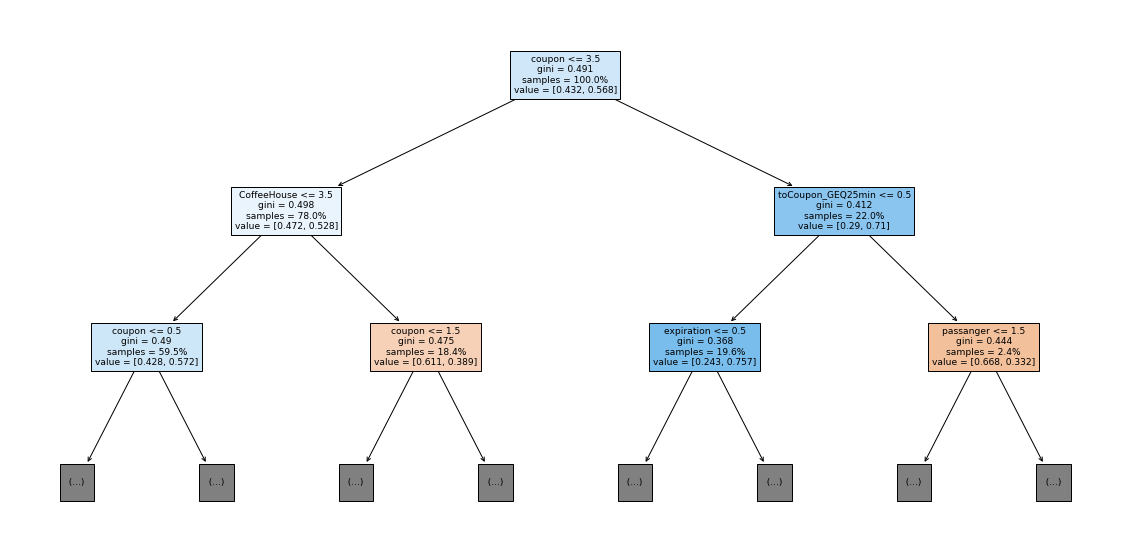

In [11]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(tree, max_depth=2, feature_names=dataframe.columns,filled=True, proportion=True)
plt.show()

In [10]:
tree = DecisionTreeClassifier()
tree = tree.fit(dataframe,y)

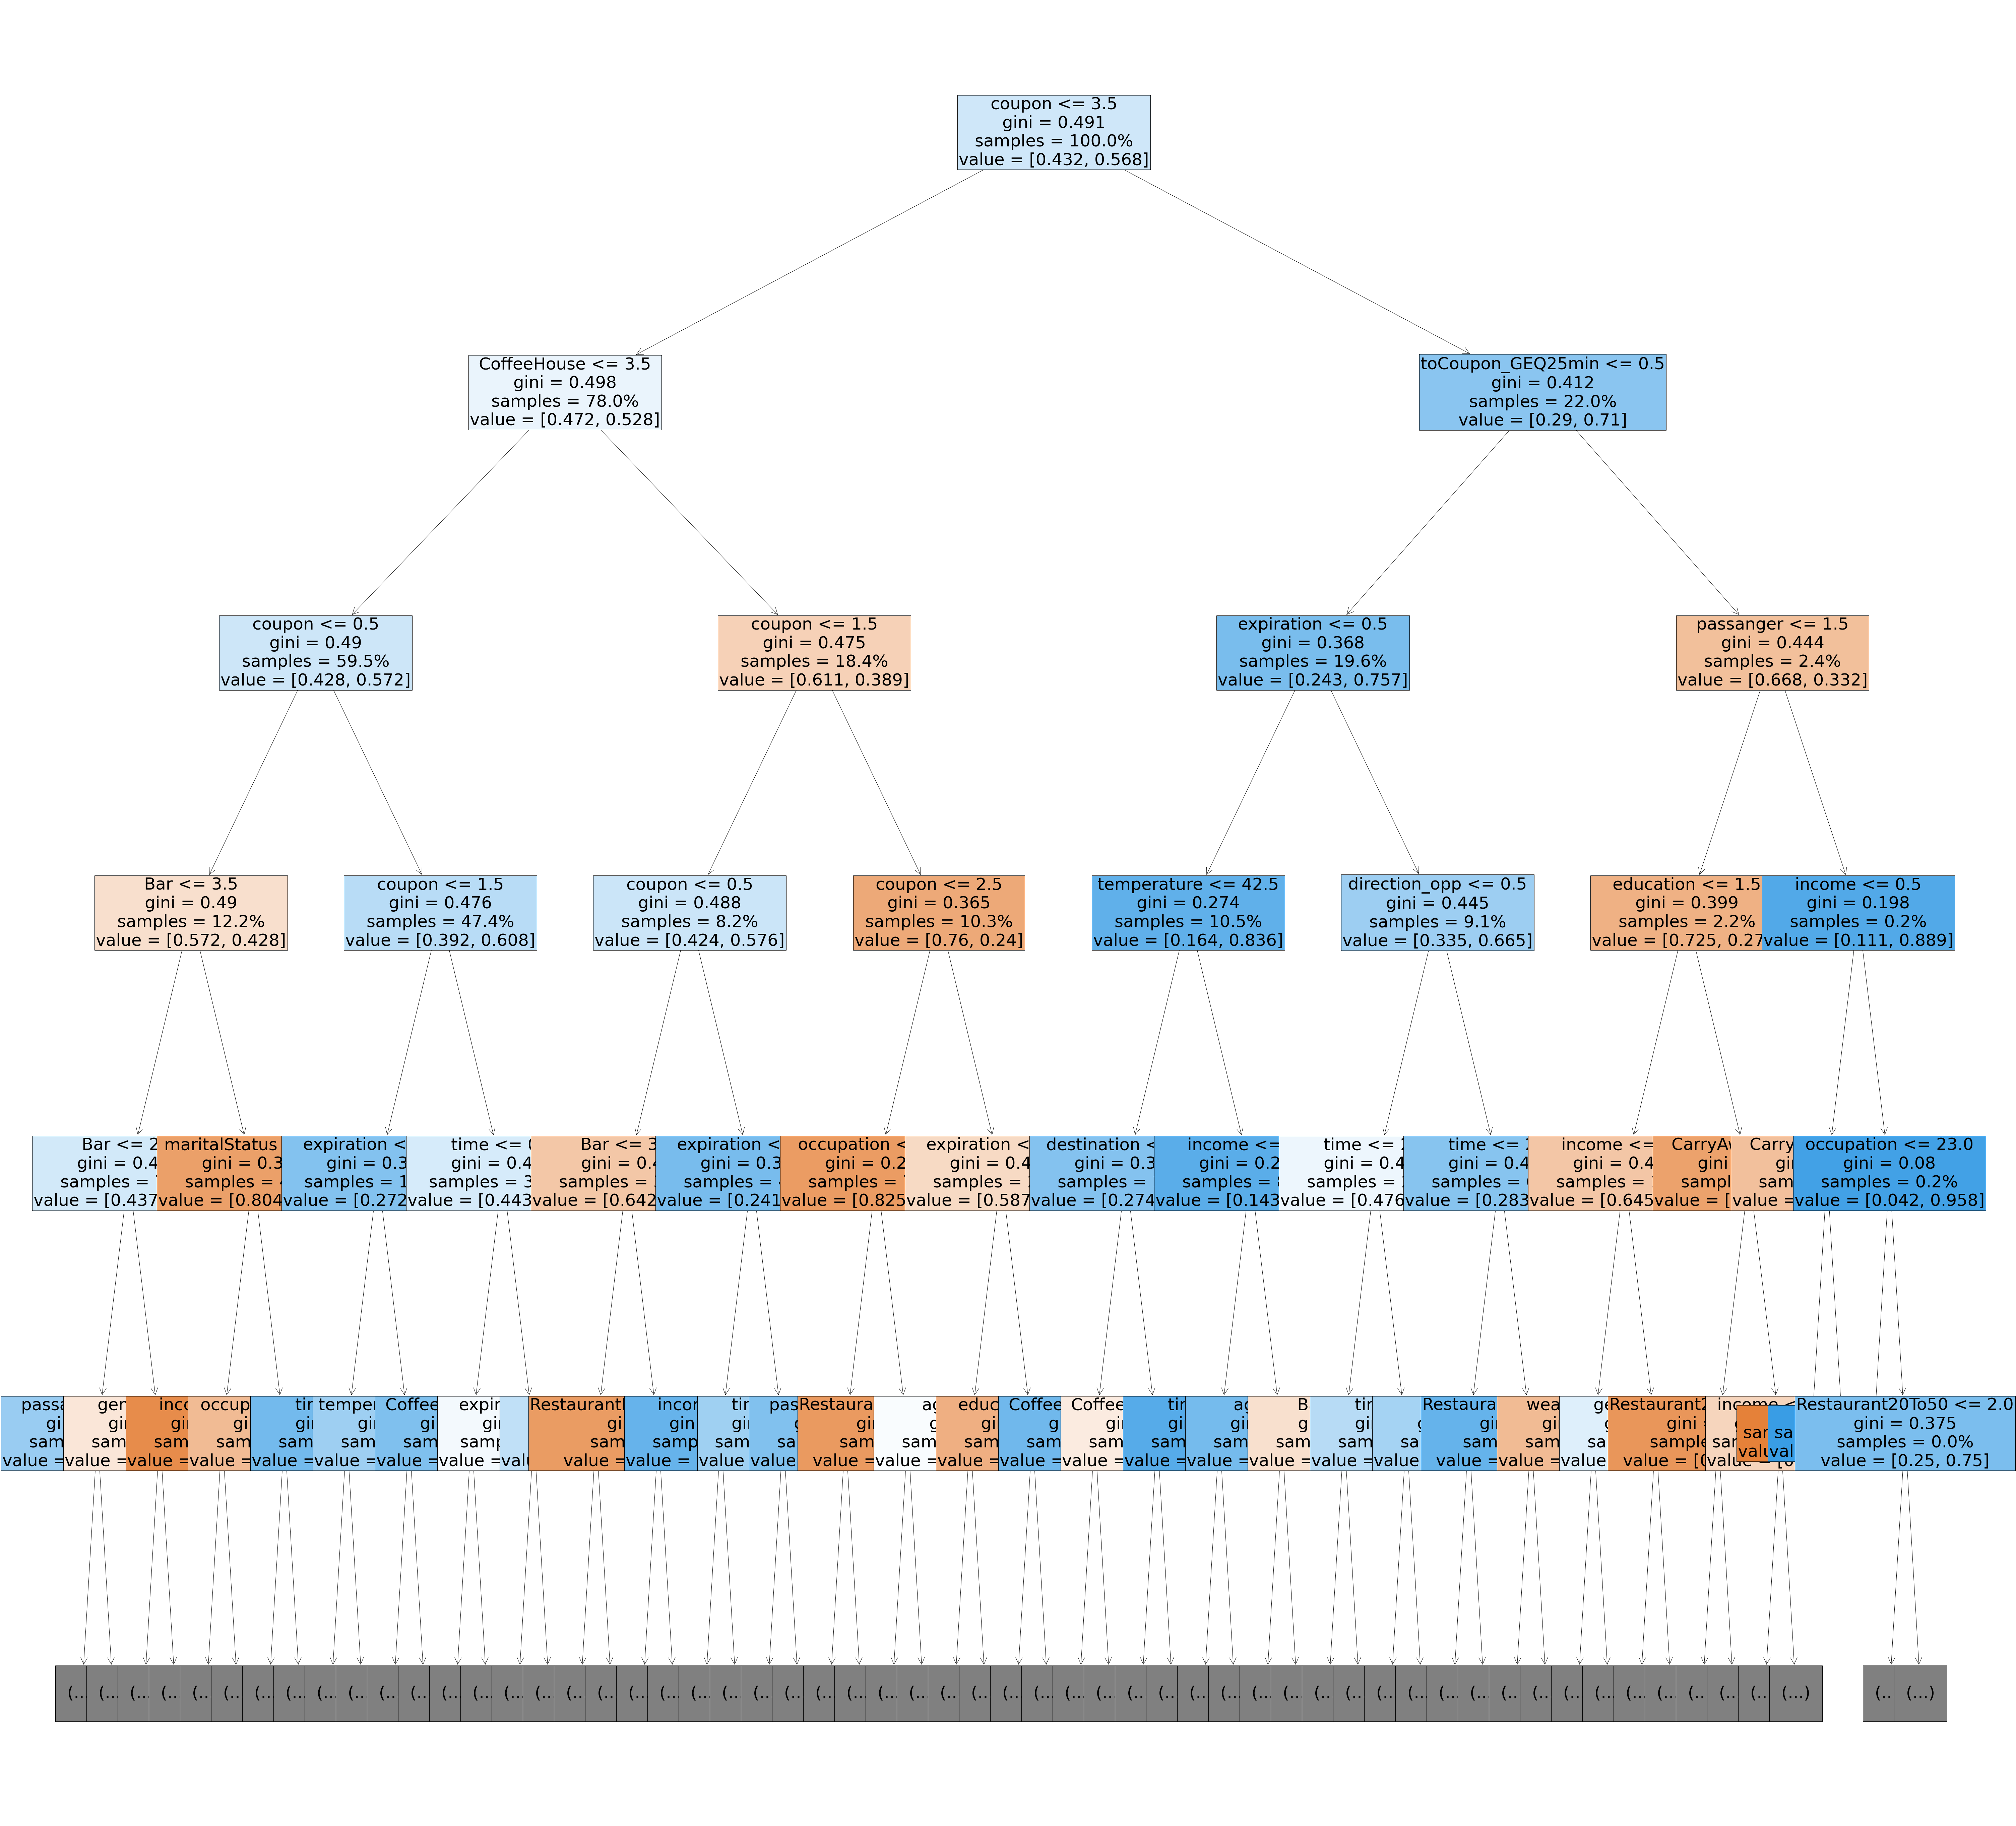

In [12]:
fig,ax = plt.subplots(1,1,figsize=(100,100))
_ = plot_tree(tree, max_depth=5,feature_names=dataframe.columns,filled=True, proportion=True, ax=ax, fontsize=50)
plt.show()

$$
G=1-\sum_{i=1}^2p_i^2
$$


In [13]:
#coupon <=3.5 G=0.491
np.round(1 - (0.432)**2 - (0.568)**2,3)

0.491

In [14]:
#CoffeeHouse <=3.5 G=0.498
np.round(1 - (0.472)**2 - (0.528)**2,3)

0.498

In [15]:
#expiration <=0.5 G=0.368
np.round(1 - (0.243)**2 - (0.757)**2,3)

0.368

## III. Random forest feature importance

1.   Train a random forest classifier on all the data using the sklearn API
     -   Use default values again, but fix the `random_state` to $57$!
2.   Plot the importance values of the $10$ most important features
     -   Create a bar plot where the height of the bar is the feature importance
     -   The `feature_importances_` attribute is helpful

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
y=y.values[:,0]

forest = RandomForestClassifier(random_state=57)
forest = forest.fit(dataframe,y)

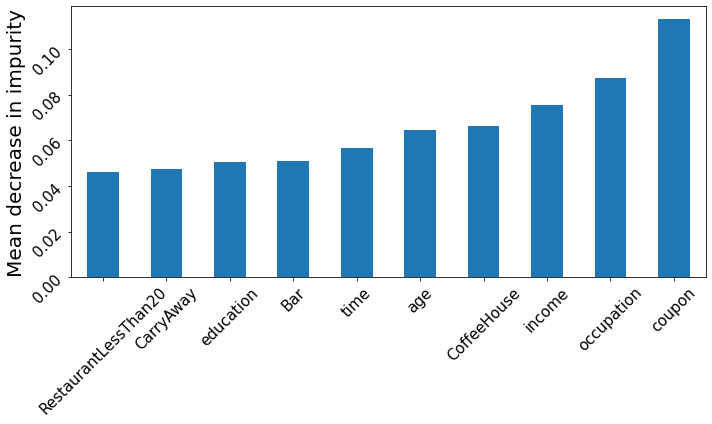

In [18]:
importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=dataframe.columns).sort_values()[-10:]

fig, ax = plt.subplots(1,1, figsize=(10,6))
forest_importances.plot.bar(ax=ax)

ax.set_ylabel("Mean decrease in impurity",fontsize=20)
ax.tick_params(labelsize=15,rotation=45)
fig.tight_layout()

## IV. Evaluation

1.   Generate prediction probabilities with a **decision tree** and with a
     **random forest model**
     -   Use $5$-fold cross validation for both models
     -   Use default parameters for both models
2.   Compare the two models with ROC curves
     -   Why does the shape of the decision tree's ROC curve looks different?

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
tree_pred=cross_val_predict(estimator = DecisionTreeClassifier(), 
                         X = dataframe,
                         y = y, 
                         cv = 5,
                         method='predict_proba')

forest_pred=cross_val_predict(estimator = RandomForestClassifier(), 
                           X = dataframe,
                           y = y, 
                           cv =5,
                           method='predict_proba')

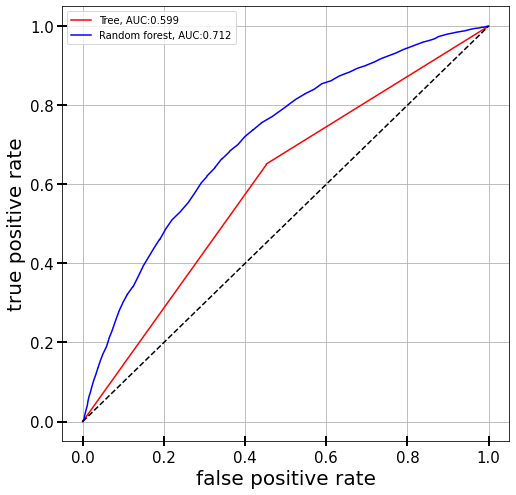

In [21]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig,ax = plt.subplots(1,1,figsize=(8,8))

fpr,tpr,_ = roc_curve(y, tree_pred[:,1])
fpr0,tpr0=fpr,tpr
ax.plot(fpr,tpr,'r-', label='Tree, AUC:'+str(np.round(roc_auc_score(y,tree_pred[:,1]),3)))

fpr,tpr,_ = roc_curve(y,forest_pred[:,1])
ax.plot(fpr,tpr,'b-', label='Random forest, AUC:'+str(np.round(roc_auc_score(y,forest_pred[:,1]),3)))

ax.plot([0,1],[0,1],'k', ls='--')

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('false positive rate', fontsize=20)
ax.set_ylabel('true positive rate', fontsize=20)
ax.tick_params(labelsize=15,direction='inout', size=10,width=2)
ax.legend()
ax.grid()
plt.show()

## V. Tuning model

1.   Using $80\%$ - $20\%$ train-test split generate predictions for a **random
     forest model**
     -   Set the `random_state` parameter for every run to $57$ for the
         train-test split and for the Random Forest Classifier as well!
2.   Plot the AUC as the function of the number of trees in the forest for both
     the traing and the test data!
3.   Do we experience overfitting if we use too many trees?

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.2, random_state=57)

In [24]:
number_of_trees = np.arange(1,100)

AUC_test = np.empty(len(number_of_trees))
AUC_train = np.empty(len(number_of_trees))

for i,n in enumerate(number_of_trees):
    forest = RandomForestClassifier(n_estimators=n, random_state=57)
    forest.fit(X_train, y_train)
    train = forest.predict_proba(X_train)
    test  = forest.predict_proba(X_test)
    
    AUC_train[i] = roc_auc_score(y_train, train[:,1])
    AUC_test[i] = roc_auc_score(y_test, test[:,1])

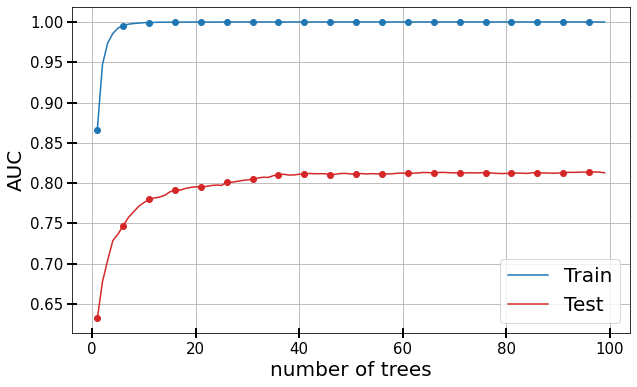

In [25]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(number_of_trees, AUC_train, '-', color='tab:blue', label='Train')
ax.plot(number_of_trees[::5], AUC_train[::5], 'o', color='tab:blue')
ax.plot(number_of_trees, AUC_test, '-', color='tab:red', label='Test')
ax.plot(number_of_trees[::5], AUC_test[::5], 'o', color='tab:red')

ax.tick_params(labelsize=15, direction='inout', size=10,width=2)
ax.legend(fontsize=20)
ax.grid()
ax.set_xlabel('number of trees', fontsize=20)
ax.set_ylabel('AUC', fontsize=20)
plt.show()